# FAKE NEWS DETECTION

In [47]:
import pandas as pd
import itertools
import numpy as np

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score

# READING OUR DATASET

In [49]:
df=pd.read_csv('news.csv')

In [50]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# NOW SPLITTING THE DATA FOR TRAINING AND TESTING

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.2)

In [52]:
len(x_train)

5068

In [53]:
len(x_test)

1267


# USING TFIDF VECTORIZER 

In [54]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf.fit_transform(x_train)
tfidf_test=tfidf.transform(x_test)    
#Note that test data can only be transform not fit

# PASSIVE AGGRESSIVE CLASSIFIER

In [46]:
pc=PassiveAggressiveClassifier(max_iter=50)
pc.fit(tfidf_train,y_train)
y_pred=pc.predict(tfidf_test)

In [32]:
score=accuracy_score(y_test,y_pred)

In [36]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.16%


In [40]:
cm=confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

In [56]:
cm

array([[571,  37],
       [ 37, 622]], dtype=int64)

In [41]:
import seaborn as sn

<AxesSubplot:>

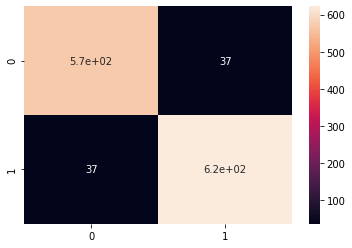

In [42]:
sn.heatmap(cm,annot=True)